In [171]:
#Codigos utilizados en este codigo solo para fines de aprendizaje
#https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
#https://github.com/bhattbhavesh91/visualize-decision-tree/blob/master/visualize-dt-notebook.ipynb
#https://ligdigonzalez.com/predecir-la-supervivencia-del-titanic-utilizando-python/
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd
from IPython.display import Image 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from io import StringIO # libreria para obtener los datos de entrenamiento para hacer el archivo dot
import pydotplus #libreria para crear archivo en formato dot
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [172]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [173]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(train.shape)
print(test.shape)

#Verifico el tipo de datos contenida en ambos dataset
print('Tipos de datos:')
print(train.info())
print(test.info())

#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

#Verifico las estadísticas del dataset
print('Estadísticas del dataset:')
print(train.describe())
print(test.describe())

Cantidad de datos:
(891, 12)
(418, 11)
Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

In [174]:
#Cambio los datos de sexos en números
train['Sex'].replace(['female','male'],[0,1],inplace=True)
test['Sex'].replace(['female','male'],[0,1],inplace=True)

#Cambio los datos de embarque en números
train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

#Reemplazo los datos faltantes en la edad por la media de esta columna
print(train["Age"].mean())
print(test["Age"].mean())
promedio = 30
train['Age'] = train['Age'].replace(np.nan, promedio)
test['Age'] = test['Age'].replace(np.nan, promedio)

#Creo varios grupos de acuerdo a bandas de las edades
#Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
train['Age'] = pd.cut(train['Age'], bins, labels = names)
test['Age'] = pd.cut(test['Age'], bins, labels = names)

#Se elimina la columna de "Cabin" ya que tiene muchos datos perdidos
train.drop(['Cabin'], axis = 1, inplace=True)
test.drop(['Cabin'], axis = 1, inplace=True)

#Elimino las columnas que considero que no son necesarias para el analisis
train =train.drop(['PassengerId','Name','Ticket'], axis=1)
test = test.drop(['Name','Ticket'], axis=1)

#Se elimina las filas con los datos perdidos
train.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)

#Verifico los datos
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

print(train.shape)
print(test.shape)

print(test.head())
print(train.head())

29.69911764705882
30.272590361445783
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)
   PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   5      0      0   7.8292         0
1          893       3    0   6      1      0   7.0000         1
2          894       2    1   7      0      0   9.6875         0
3          895       3    1   5      0      0   8.6625         1
4          896       3    0   4      1      1  12.2875         1
   Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   4      1      0   7.2500       1.0
1         1       1    0   5      1      0  71.2833       2.0
2         1       3    0   5      0      0   7.9250       1.0
3         1       1    0   5     

In [175]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#10 % para los datos de prueba  y 90% para los datos de entrenamiento

In [194]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# decision tree Score
round(np.mean(score)*100, 2)

[0.74157303 0.78651685 0.85393258 0.80898876 0.87640449 0.82022472
 0.84269663 0.73033708 0.84269663 0.75      ]


80.53

In [199]:
clf = DecisionTreeClassifier(max_depth =3, 
                             random_state = 0)

In [200]:
clf.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [201]:
clf.predict(X_test[3].reshape(1, -1))




array([0], dtype=int64)

Arbol de desiciones

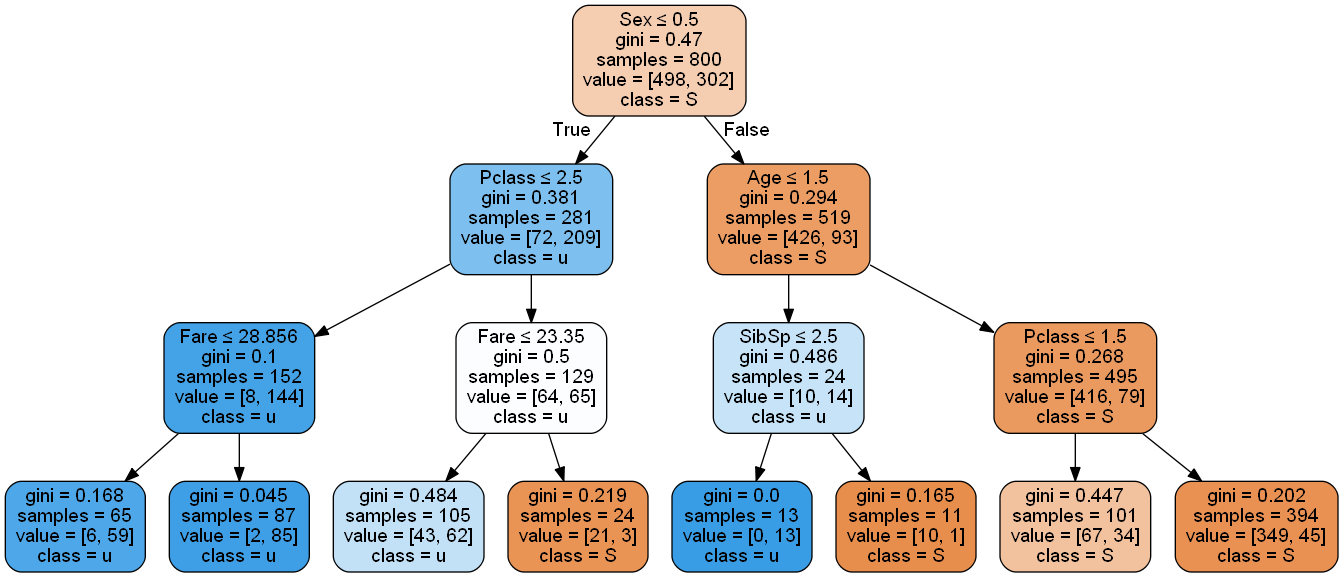

In [202]:
def plot_decision_tree(clf,feature_name,target_name):
   
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
   
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())
plot_decision_tree(clf, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],'Survived')

In [188]:

clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
